# Zadaća 1
##### Rok za predaju: 03. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

## Zadatak 1 (5)
___
Pokažite kako je funkcija $J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$ konveksna. <br>
(Pomoć: veza sa Hessijanom. )


Vaš odgovor ovdje

---

## Zadatak 2 (10)
___
Izračunajte gradijent funkcije $J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$ tj. raspišite kako biste dobili izraz dan na predavanju.

Vaš odgovor ovdje \
$J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$ \
$h_{\theta}(x^{(i)})=\theta_0 + \sum\limits_{i=1}^{m}(\theta_ix^{(i)})$ \
$\frac{\delta h_{\theta}(x^{(i)})}{\delta \theta_0} = 1$,$\frac{\delta  h_{\theta}(x^{(i)})}{\delta \theta_j} = x_j^{(i)}$ \
$\frac{\delta J(\theta)}{\delta \theta_0} = \frac{\delta}{\delta \theta_0}(\frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2) = \frac{\delta}{\delta \theta_0}(\frac{1}{2m}\sum\limits_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}-y^{(i)})^2) = \frac{1}{m}\sum\limits_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}-y^{(i)})*1 $
$\frac{\delta J(\theta)}{\delta \theta_j} = \frac{\delta}{\delta \theta_j}(\frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2) = \frac{\delta}{\delta \theta_j}(\frac{1}{2m}\sum\limits_{i=1}^{m}(\theta_0 + \theta_jx^{(i)}-y^{(i)})^2) = \frac{1}{m}\sum\limits_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}-y^{(i)})*x_j^{(i)} $

---


## Zadatak 3 (15)
___
Neka su zadani ulazni podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y\in\mathbb{R}^{m}$. Na ovim podacima možemo provesti proces učenja modela linearne regresije. <br>
Znamo kako se učenje svodi na minimizaciju funkcije $J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$ te kako do rješenje tog minimizacijskog problema možemo doći gradijentnom metodom. <br>
Implementirajte gradijentnu metodu za učenje modela linearne regresije u općenitom slučaju kada su ulazni podaci dimenzije $X\in \mathbb{R}^{m\times n}$.<br>

Dodajte sljedeću mogućnost svojoj implementaciji gradijentne metode: crtanje grafa ovisnosti funkcije troška $J(\theta)$ o iteracijama. (U svakoj iteraciji spremite vrijednost funkcije troška)

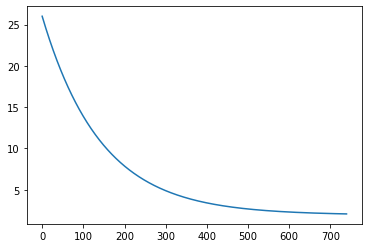

In [108]:
def ThetaFunction(row, theta):
    totalSum = 0.0
    
    for i in range(len(row)):
        totalSum = totalSum + row[i]*theta[i]
    
    return totalSum
    
def LossFunction(xMatrix, yMatrix, theta, numData):   
    totalSum = 0.0
    for i in range(numData):
        totalSum = totalSum + (ThetaFunction(xMatrix[i],theta) - yMatrix[i])**2 
        
    totalSum = totalSum/(2*numData)
    return totalSum
    

#IOdata - lista gdije joj je prvi element matrica X a drugi element matrica Y
def GradientMethod(IOdata, alpha):
    theta = []
    numProperties = np.array(IOdata[0]).shape[1]
    numData = np.array(IOdata[0]).shape[0]
    
    xMatrix = np.array(IOdata[0])
    yMatrix = np.array(IOdata[1])

    for i in range(numProperties):
        theta.append(1)
        
    convergence = False
    oldLoss = []
    oldLoss.append(LossFunction(xMatrix, yMatrix, theta, numData))
    while(not(convergence)):
        for j in range(numProperties):
            totalSum = 0.0
            for i in range(numData):
                totalSum = totalSum + (ThetaFunction(xMatrix[i],theta) - yMatrix[i])*xMatrix[i][j]

            theta[j] = theta[j] - alpha * (totalSum/numData)
        
        newLoss = LossFunction(xMatrix,yMatrix,theta,numData)
        if(abs(oldLoss[len(oldLoss) - 1] - newLoss) < 10**(-3)):
            convergence = True
        
        oldLoss.append(newLoss)
        
    
    return [theta, oldLoss]

result = GradientMethod([[[1,2,3,4],[1,5,6,7]],[8,9]],0.00005)

y = result[1]
x = [k for k in range(len(y))]

plt.plot(x,y)
plt.show()

## Zadatak 4 (15)
___
U datoteci house_train.csv i house_test.csv su vam dani podaci o nekretninama, koji sadrže različite karakteristike nekretnina poput površine ili broja soba te cijenu. Cilj narednih zadataka će biti uspostaviti linearnu regresiju između različitih karakteristika kuće u svrhu predviđanja cijene nekretnine. 

Kao ulaznu varijablu uzmite sqft_living, a kao izlaznu varijablu price. 

1. Učitajte podatke koji su vam dani u datoteci *house_train.csv*. Skalirajte podatke koristeći metodu objašnjenu na sljedećem [linku](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale) 

1. Koristeći proizvoljnu biblioteku vizualizirajte odnos varijable ulaznih i izlaznih podataka. 

1. Koristeći *numpy array* napravite matricu dizajna $X\in \mathbb{R}^{m\times (n+1)}$ i vektor izlaznih podataka $y \in \mathbb{R}^{m}$. 

1. Pokrenite gradijentnu metodu koju ste implementirali u prethodnom zadatku i pomoću nje odredite parametre $\theta_0$ i $\theta_1$. (Stopu učenja i broj iteracija odredite sami)

1. Pravac određen izračunatime  parametrima $\theta_0 + \theta_1 x$ prikažite na grafu iz podzadatka b).
1. Nacrtajte  graf promjene funkcije troška $J(\theta)$ kroz iteracije.
1. Učitajte podatke iz datoteke \textit{house\_test.csv}, spremite ih u odgovarajuće \textit{numpy arrays} $X_{test}$ i $y_{test}$. Pazite, $X_{test}$ je ponovno matrica dizajna kao i $X$. Kao u podzadatku b), podatke prikažite  grafički.
1. Na učitanim podacima za testiranje provedite testiranje vašeg modela tako da izračunate pogrešku kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

8. Za podatke $X$ i $y$ učitane iz datoteke *house\_train.csv* odredite opet parametre $\theta_0, \theta_1$, ali koristeći gotovu implementaciju iz [*sklearn*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html}{sklearn.LinearRegression) biblioteke. (Pazite na dimenzije)

1. Na učitanim podacima za testiranje provedite testiranje ovog modela kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

1. Razlikuju li se model kojeg ste dobili koristeći vašu implementaciju gradijentne metode i model kojeg ste dobili koristeći gotovu implementaciju iz *scikit-learn* paketa? 

1. Za podatke $X$ i $Y$ učitane iz datoteke *house_train.csv* odredite opet parametre $\theta_0, \theta_1$, ali koristeći sustav normalnih jednadžbi. 

In [87]:
# 1)
data = pd.read_csv('./podaci/house_train.csv')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

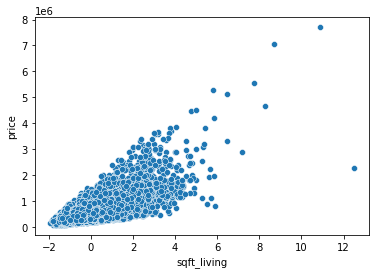

In [88]:
# 2)
data['sqft_living'] = preprocessing.scale(data['sqft_living'])

sns.scatterplot(data=data, x="sqft_living", y="price")

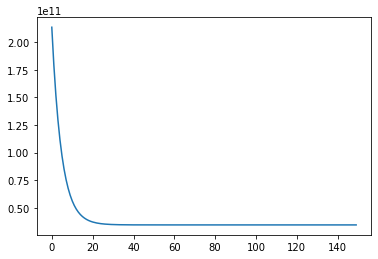

In [145]:
X = data['sqft_living']
X = [[1,X[k]] for k in range(len(X))]
Y = data['price']
result = GradientMethod([X,Y], 0.1)
y = result[1]
x = [k for k in range(len(y))]

plt.plot(x,y)
plt.show()

[540455.4575877634, 257031.50790166424]


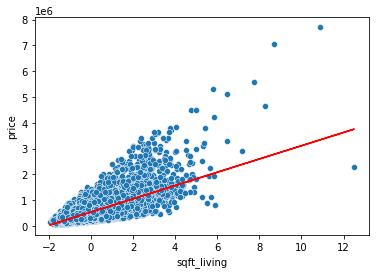

In [132]:
# 5)
print(result[0])
kvadratura = np.array(data['sqft_living'])

pravac = result[0][0] + kvadratura*result[0][1]
sns.scatterplot(data=data, x="sqft_living", y="price")
plt.plot(kvadratura,pravac,'-r')

[-0.12044273 -0.98360569 -0.69228819 ... -0.82176263 -0.58439282
 -1.13465921]


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

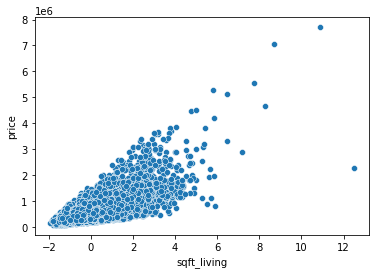

In [133]:
# 7)
data2 = pd.read_csv('./podaci/house_test.csv')

data2['sqft_living'] = preprocessing.scale(data2['sqft_living'])
X = np.array(data2['sqft_living'])
Y = data2['price']
sns.scatterplot(data=data, x="sqft_living", y="price")

In [140]:
# 8)
data2 = pd.read_csv('./podaci/house_test.csv')

data2['sqft_living'] = preprocessing.scale(data2['sqft_living'])
X = data2['sqft_living']
X = [[1,X[k]] for k in range(len(X))]
Y = data2['price']

result = GradientMethod([X,Y], 0.1)
print(result[0])

[538618.6377144991, 260502.67933086216]


In [142]:
# 9) & 10)
data2 = pd.read_csv('./podaci/house_test.csv')

data2['sqft_living'] = preprocessing.scale(data2['sqft_living'])
X = np.array(data2['sqft_living'])
Y = data2['price']
jedinice = [1 for k in range(len(X))]
jedinice = np.array(jedinice).reshape(-1,1)
Xtest = X
Xtest = Xtest.reshape(-1,1)
Xtest = np.c_[jedinice, Xtest]

lr = LinearRegression(fit_intercept=False)
lr.fit(Xtest,Y)

print(lr.coef_)
pogreška = 0
for i,prediction in enumerate(lr.predict(Xtest)):
    pogreška += (prediction -  Y[i])**2
print(pogreška/(2*Xtest.shape[0]))

[538618.71963914 260502.7189536 ]
33172683536.46069


## Zadatak 5 (15)
___
U ovom zadatku ulazni podaci će biti višestruki. Izlazna varijabla je i dalje price. 
1. Odaberite nekoliko karakteristika koje će vam biti ulazni podaci. Reprezentirajte ih kao \textit{numpy arrays}.  (Npr. 3 karakteristike)
1. Izračunajte parametre $\theta_0, \theta_1$ koristeći implementaciju gradijentne metode iz trećeg zadatka. 
1. Učitajte podatke iz datoteke \textit{house\_test.csv}, spremite ih u odgovarajuće \textit{numpy arrays} $X_{test}$ i $y_{test}$.
1. Na učitanim podacima za testiranje provedite testiranje vašeg modela tako da izračunate pogrešku kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

In [21]:
# Vaš kod ovdje